In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
#!pip install seaborn

In [4]:
import seaborn as sns

In [5]:
import glob

In [6]:
sns.set_context('poster')

# READ SAMPLE DATA

In [8]:
ls data

readme


In [9]:
tmp = []
for fname in sort(glob.glob('data/DAT_ASCII_USDJPY_T_*.csv')):
    print(fname)
    tmp.append(pd.read_csv(fname, 
                names=['datetime_stamp', 'bid_quote', 'ask_quote', 'volume']))
    
df = pd.concat(tmp)

ValueError: No objects to concatenate

In [9]:
%%time
df['datetime_stamp'] = pd.to_datetime(df['datetime_stamp'],
                                     format='%Y%m%d %H%M%S%f')

df['delta_t'] = df.datetime_stamp.diff()

df['mid'] = 0.5 * (df['bid_quote'] + df['ask_quote'])

CPU times: user 29.2 s, sys: 612 ms, total: 29.8 s
Wall time: 29.6 s


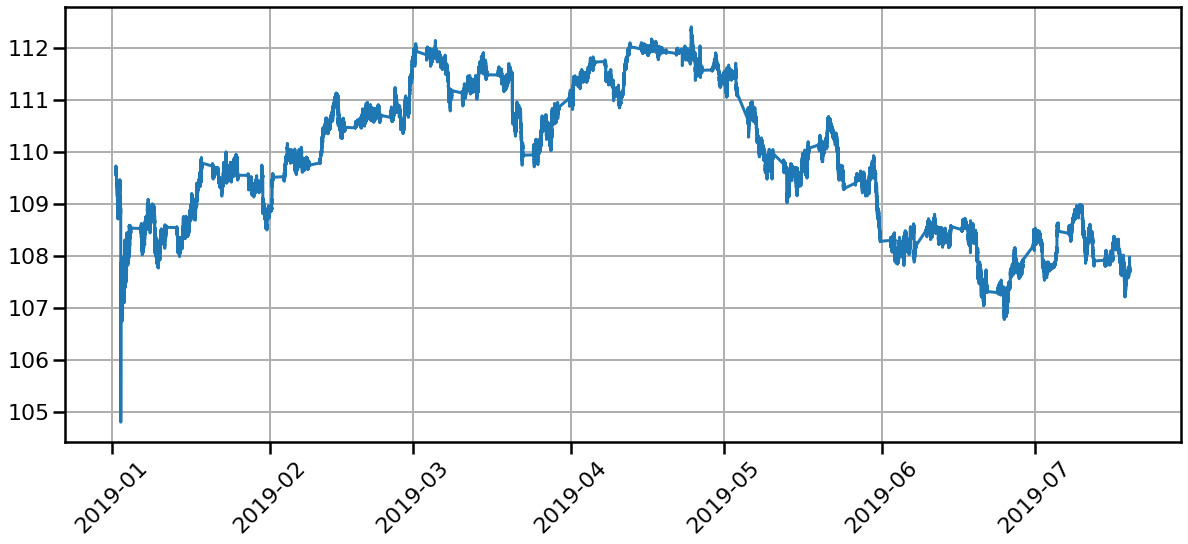

In [10]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df.datetime_stamp, df.mid)
ax.grid()
plt.xticks(rotation=45);

In [11]:
# downsampling to 1 min open price and drop weekend timeseries data
df.set_index('datetime_stamp', inplace=True)
week_ends = df[df.delta_t > datetime.timedelta(days=1)]['delta_t'].reset_index()
df_min = df['mid'].resample('1T').first().fillna(method='ffill').to_frame()

#add date time feature
df['hour'] = df.index.hour
df['day'] = df.index.weekday
df['month'] = df.index.month
df['week'] = df.index.week

#remove weekends ticks

for i0, i1 in zip(week_ends.datetime_stamp, week_ends.delta_t):
    print('drop', i0 - i1, i0)
    start_remove = i0 - i1
    end_remove = i0
    df_min = df_min.query('index < @start_remove or index > @end_remove')

drop 2019-01-04 16:59:50.728000 2019-01-06 17:00:03.117000
drop 2019-01-11 16:59:49.970000 2019-01-13 17:00:04.924000
drop 2019-01-18 16:59:56.147000 2019-01-20 17:00:04.502000
drop 2019-01-25 16:59:54.123000 2019-01-27 17:00:04.571000
drop 2019-02-01 16:59:56.384000 2019-02-03 17:00:11.247000
drop 2019-02-08 16:59:56.133000 2019-02-10 17:00:01.357000
drop 2019-02-15 16:59:53.064000 2019-02-17 17:00:01.633000
drop 2019-02-22 16:59:56.239000 2019-02-24 17:00:02.968000
drop 2019-03-01 16:59:51.832000 2019-03-03 17:00:04.578000
drop 2019-03-08 16:59:56.251000 2019-03-10 17:00:00.041000
drop 2019-03-15 15:59:56.575000 2019-03-17 16:00:11.764000
drop 2019-03-22 15:59:21.145000 2019-03-24 16:00:06.087000
drop 2019-03-29 15:59:56.209000 2019-03-31 17:00:04.695000
drop 2019-04-05 16:59:56.332000 2019-04-07 17:03:18.744000
drop 2019-04-12 16:59:56.302000 2019-04-14 17:00:03.372000
drop 2019-04-19 16:59:55.722000 2019-04-21 17:00:03.722000
drop 2019-04-26 16:59:56.265000 2019-04-28 17:00:03.4720

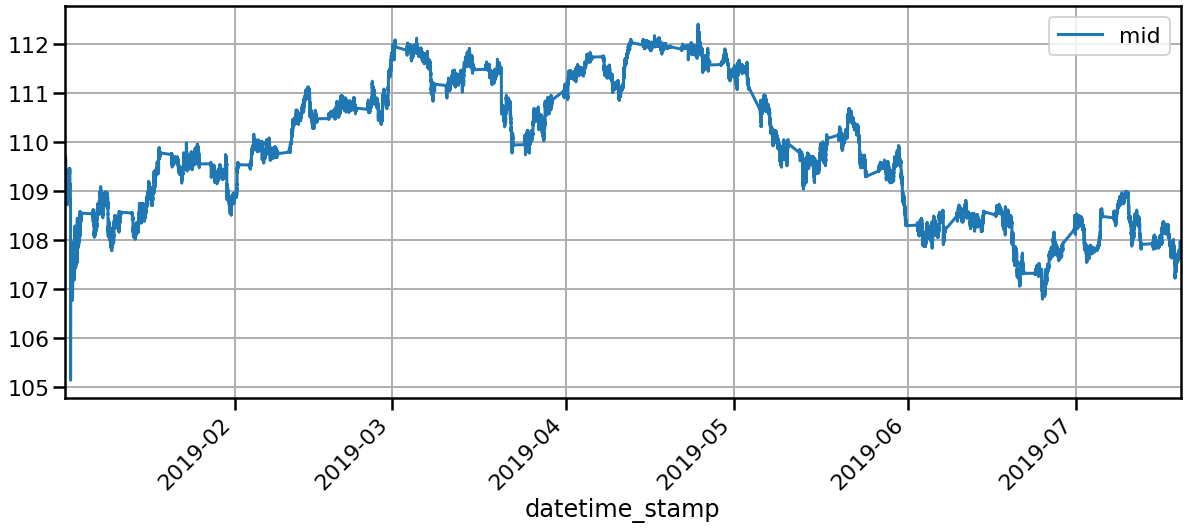

In [12]:
fig, ax = plt.subplots(figsize=(20, 8))
df_min.plot(ax=ax)
ax.grid()
plt.xticks(rotation=45);

# Add technical indicators

## Moving average (MA) and standard deviation (STD)

In [13]:
df_min['MA_5min'] = df_min['mid'].rolling(window=5).mean()
df_min['MA_8min'] = df_min['mid'].rolling(window=8).mean()
df_min['MA_13min'] = df_min['mid'].rolling(window=13).mean()
df_min['MA_1hour'] = df_min['mid'].rolling(window=60).mean()
df_min['MA_1day'] = df_min['mid'].rolling(window=1440).mean()
df_min['MA_5day'] = df_min['mid'].rolling(window=7200).mean()

In [14]:
df_min['STD_5min'] = df_min['mid'].rolling(window=5).std()
df_min['STD_8min'] = df_min['mid'].rolling(window=8).std()
df_min['STD_13min'] = df_min['mid'].rolling(window=13).std()
df_min['STD_1hour'] = df_min['mid'].rolling(window=60).std()
df_min['STD_1day'] = df_min['mid'].rolling(window=1440).std()
df_min['STD_5day'] = df_min['mid'].rolling(window=7200).std()

In [15]:
df_min['momentum'] = df_min['mid'].diff() # momentum

CPU times: user 128 ms, sys: 3.82 ms, total: 132 ms
Wall time: 130 ms


/usr/local/lib/python3.6/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


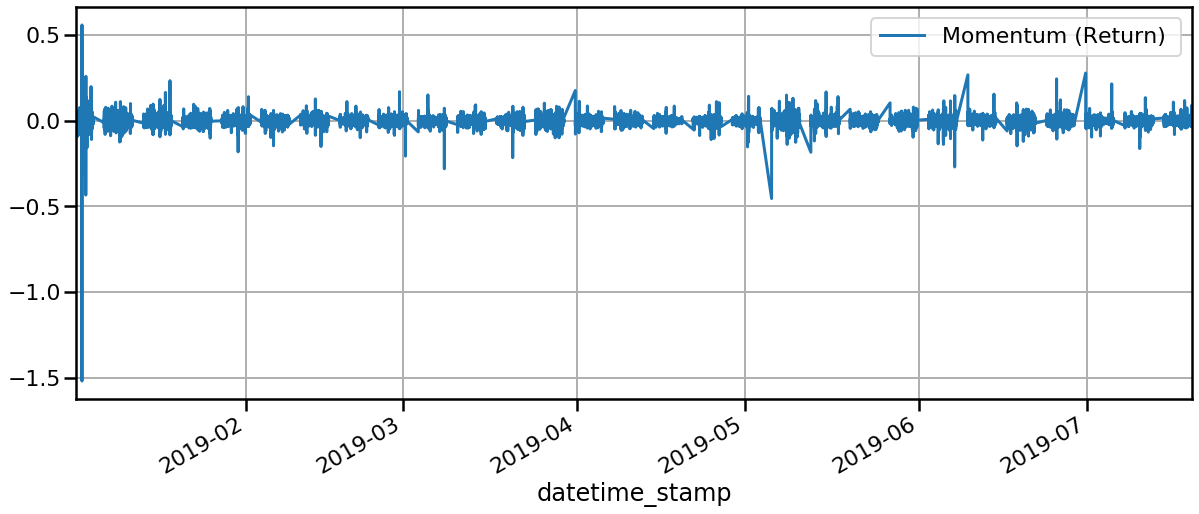

In [16]:
%%time
fig, ax = plt.subplots(figsize=(20, 8))
df_min['momentum'].plot(ax=ax, label='Momentum (Return) ')
ax.legend()
ax.grid()

In [17]:
df_min = df_min.fillna(0)

In [18]:
df_min.head(50)

,mid,MA_5min,MA_8min,MA_13min,MA_1hour,MA_1day,MA_5day,STD_5min,STD_8min,STD_13min,STD_1hour,STD_1day,STD_5day,momentum
datetime_stamp,,,,,,,,,,,,,,
2019-01-01 17:00:00,109.6685,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00
2019-01-01 17:01:00,109.6700,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.500000e-03
2019-01-01 17:02:00,109.6700,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00
2019-01-01 17:03:00,109.6700,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,-1.421085e-14
2019-01-01 17:04:00,109.6695,109.6696,0.000000,0.000000,0.0,0.0,0.0,0.000652,0.000000,0.000000,0.0,0.0,0.0,-5.000000e-04
2019-01-01 17:05:00,109.6695,109.6698,0.000000,0.000000,0.0,0.0,0.0,0.000274,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00
2019-01-01 17:06:00,109.6695,109.6697,0.000000,0.000000,0.0,0.0,0.0,0.000274,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00
2019-01-01 17:07:00,109.6700,109.6697,109.669625,0.000000,0.0,0.0,0.0,0.000274,0.000518,0.000000,0.0,0.0,0.0,5.000000e-04
2019-01-01 17:08:00,109.6660,109.6689,109.669312,0.000000,0.0,0.0,0.0,0.001636,0.001361,0.000000,0.0,0.0,0.0,-4.000000e-03


In [19]:
df_min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205650 entries, 2019-01-01 17:00:00 to 2019-07-19 16:59:00
Data columns (total 14 columns):
mid          205650 non-null float64
MA_5min      205650 non-null float64
MA_8min      205650 non-null float64
MA_13min     205650 non-null float64
MA_1hour     205650 non-null float64
MA_1day      205650 non-null float64
MA_5day      205650 non-null float64
STD_5min     205650 non-null float64
STD_8min     205650 non-null float64
STD_13min    205650 non-null float64
STD_1hour    205650 non-null float64
STD_1day     205650 non-null float64
STD_5day     205650 non-null float64
momentum     205650 non-null float64
dtypes: float64(14)
memory usage: 23.5 MB


CPU times: user 617 ms, sys: 59.7 ms, total: 676 ms
Wall time: 673 ms


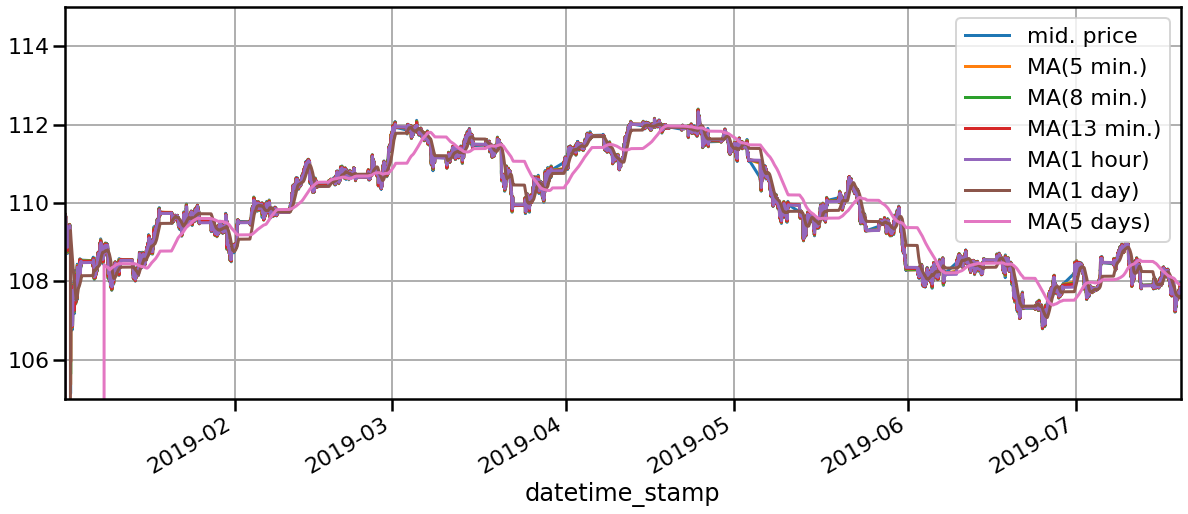

In [20]:
%%time
fig, ax = plt.subplots(figsize=(20, 8))
df_min['mid'].plot(ax=ax, label='mid. price')
df_min['MA_5min'].plot(ax=ax, label='MA(5 min.)')
df_min['MA_8min'].plot(ax=ax, label='MA(8 min.)')
df_min['MA_13min'].plot(ax=ax, label='MA(13 min.)')

df_min['MA_1hour'].plot(ax=ax, label='MA(1 hour)')
df_min['MA_1day'].plot(ax=ax, label='MA(1 day)')
df_min['MA_5day'].plot(ax=ax, label='MA(5 days)')

ax.legend()
ax.grid()

#ax.set_xlim(datetime.datetime(2019, 1, 28, 8), 
#            datetime.datetime(2019, 1, 28, 12))
ax.set_ylim(105.0, 115.0)

CPU times: user 596 ms, sys: 59 ms, total: 655 ms
Wall time: 652 ms


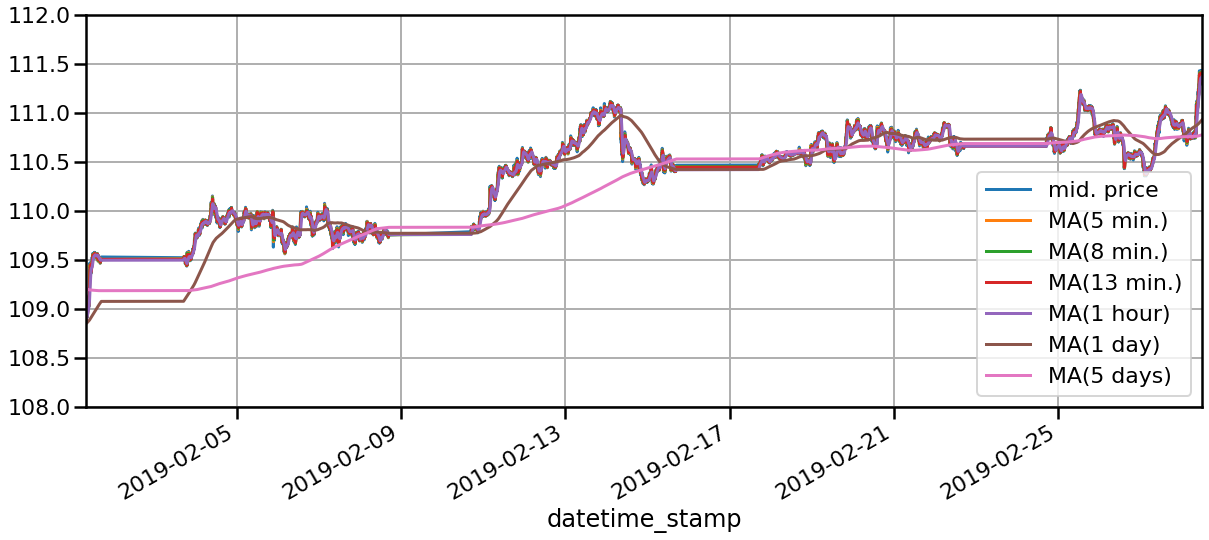

In [21]:
%%time
fig, ax = plt.subplots(figsize=(20, 8))
df_min['mid'].plot(ax=ax, label='mid. price')
df_min['MA_5min'].plot(ax=ax, label='MA(5 min.)')
df_min['MA_8min'].plot(ax=ax, label='MA(8 min.)')
df_min['MA_13min'].plot(ax=ax, label='MA(13 min.)')

df_min['MA_1hour'].plot(ax=ax, label='MA(1 hour)')
df_min['MA_1day'].plot(ax=ax, label='MA(1 day)')
df_min['MA_5day'].plot(ax=ax, label='MA(5 days)')

ax.legend()
ax.grid()

ax.set_xlim(datetime.datetime(2019, 2, 1, 8), 
           datetime.datetime(2019, 2, 28, 12))
ax.set_ylim(108.0, 112.0)

In [22]:
# Create Bollinger Bands
# Default parameters of a 20-period look back and plus/minus two standard deviations,
# bandwidth is equal to four times the 20-period coefficient of variation.
# Middle Band = 20 day moving average
# Upper Band = 20 day moving average + (20 Day standard deviation of price x 2) 
# Lower Band = 20 day moving average - (20 Day standard deviation of price x 2)
df_min['MA_20min'] = df_min['mid'].rolling(window=20).mean()
df_min['STD_20min'] = df_min['mid'].rolling(window=20).std()
df_min['upper_band'] = df_min['MA_20min'] + (df_min['STD_20min']*2)
df_min['lower_band'] = df_min['MA_20min'] - (df_min['STD_20min']*2)
    
# Create Exponential moving average
df_min['ema'] = df_min['mid'].ewm(com=0.5).mean()

df_min = df_min.fillna(0)

In [23]:
df_min.head(50)

,mid,MA_5min,MA_8min,MA_13min,MA_1hour,MA_1day,MA_5day,STD_5min,STD_8min,STD_13min,STD_1hour,STD_1day,STD_5day,momentum,MA_20min,STD_20min,upper_band,lower_band,ema
datetime_stamp,,,,,,,,,,,,,,,,,,,
2019-01-01 17:00:00,109.6685,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,109.668500
2019-01-01 17:01:00,109.6700,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.500000e-03,0.000000,0.000000,0.000000,0.000000,109.669625
2019-01-01 17:02:00,109.6700,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,109.669885
2019-01-01 17:03:00,109.6700,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,-1.421085e-14,0.000000,0.000000,0.000000,0.000000,109.669962
2019-01-01 17:04:00,109.6695,109.6696,0.000000,0.000000,0.0,0.0,0.0,0.000652,0.000000,0.000000,0.0,0.0,0.0,-5.000000e-04,0.000000,0.000000,0.000000,0.000000,109.669653
2019-01-01 17:05:00,109.6695,109.6698,0.000000,0.000000,0.0,0.0,0.0,0.000274,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,109.669551
2019-01-01 17:06:00,109.6695,109.6697,0.000000,0.000000,0.0,0.0,0.0,0.000274,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,109.669517
2019-01-01 17:07:00,109.6700,109.6697,109.669625,0.000000,0.0,0.0,0.0,0.000274,0.000518,0.000000,0.0,0.0,0.0,5.000000e-04,0.000000,0.000000,0.000000,0.000000,109.669839
2019-01-01 17:08:00,109.6660,109.6689,109.669312,0.000000,0.0,0.0,0.0,0.001636,0.001361,0.000000,0.0,0.0,0.0,-4.000000e-03,0.000000,0.000000,0.000000,0.000000,109.667280


CPU times: user 204 ms, sys: 28.7 ms, total: 233 ms
Wall time: 230 ms


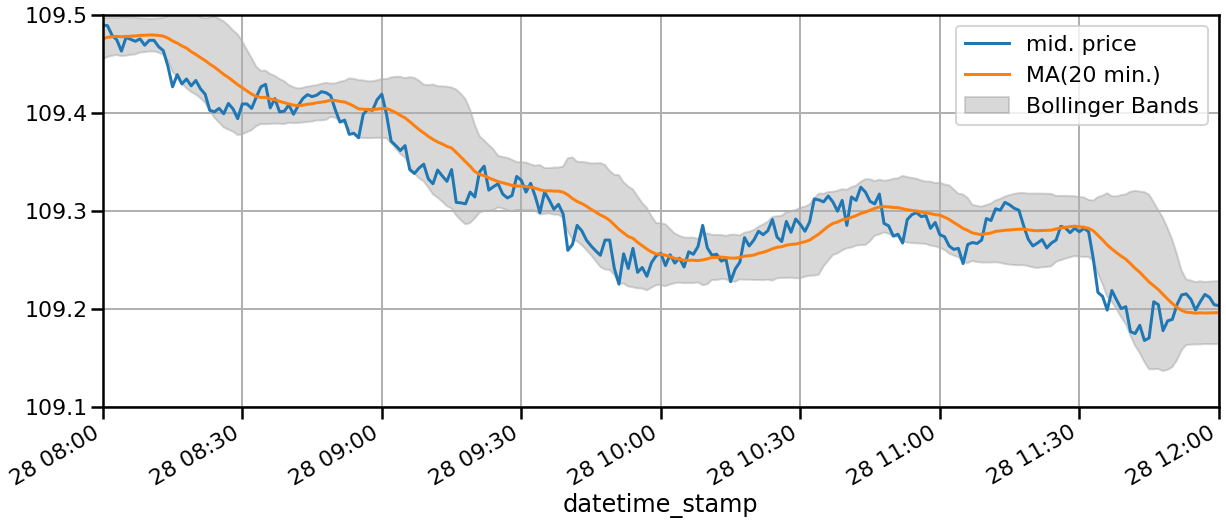

In [24]:
%%time
fig, ax = plt.subplots(figsize=(20, 8))
df_min['mid'].plot(ax=ax, label='mid. price')
ax.fill_between(df_min.index,
               df_min['upper_band'],
               df_min['lower_band'],
               color='grey', alpha=0.3, label='Bollinger Bands')
df_min['MA_20min'].plot(ax=ax, label='MA(20 min.)')


ax.legend()
ax.grid()


ax.set_xlim(datetime.datetime(2019, 1, 28, 8), 
            datetime.datetime(2019, 1, 28, 12))
ax.set_ylim(109.1, 109.5)

In [25]:
# Create MACD
df_min['ema_12'] = df_min['mid'].ewm(span=12).mean()
df_min['ema_26'] = df_min['mid'].ewm(span=26).mean()
df_min['MACD'] = (df_min['ema_12']-df_min['ema_26'])
df_min['MACD_signal'] = df_min['MACD'].ewm(span=9).mean()

In [26]:
df_min.index

DatetimeIndex(['2019-01-01 17:00:00', '2019-01-01 17:01:00',
               '2019-01-01 17:02:00', '2019-01-01 17:03:00',
               '2019-01-01 17:04:00', '2019-01-01 17:05:00',
               '2019-01-01 17:06:00', '2019-01-01 17:07:00',
               '2019-01-01 17:08:00', '2019-01-01 17:09:00',
               ...
               '2019-07-19 16:50:00', '2019-07-19 16:51:00',
               '2019-07-19 16:52:00', '2019-07-19 16:53:00',
               '2019-07-19 16:54:00', '2019-07-19 16:55:00',
               '2019-07-19 16:56:00', '2019-07-19 16:57:00',
               '2019-07-19 16:58:00', '2019-07-19 16:59:00'],
              dtype='datetime64[ns]', name='datetime_stamp', length=205650, freq=None)

CPU times: user 184 ms, sys: 341 µs, total: 184 ms
Wall time: 183 ms


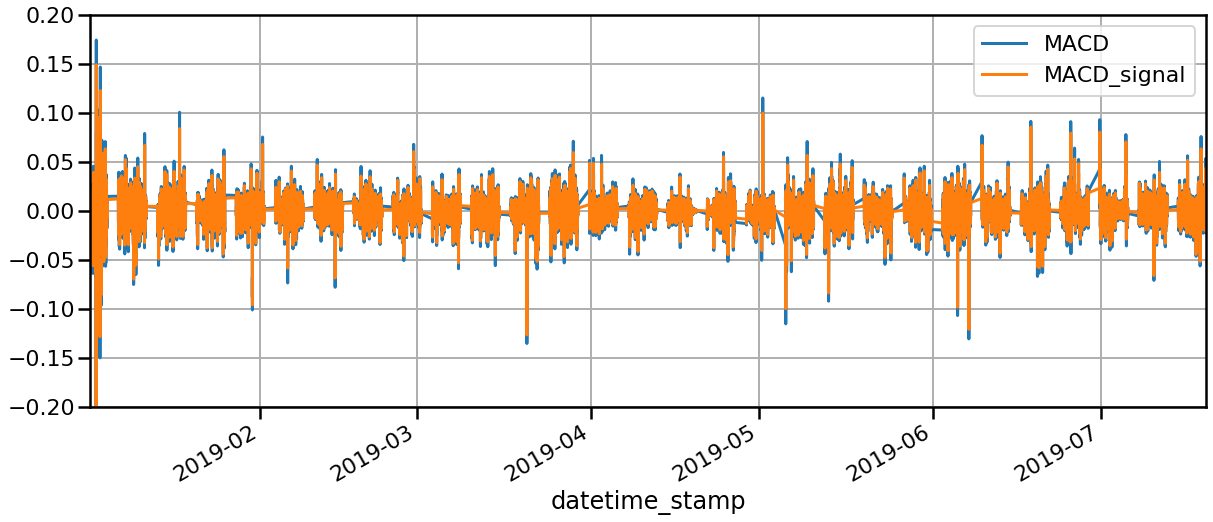

In [27]:
%%time
fig, ax = plt.subplots(figsize=(20, 8))
#df_min['mid'].plot(ax=ax, label='mid. price')
df_min['MACD'].plot(ax=ax, label='MACD')
df_min['MACD_signal'].plot(ax=ax, label='MACD_signal')

ax.legend()
ax.grid()

#ax.set_xlim(datetime.datetime(2019, 1, 28, 8), 
#            datetime.datetime(2019, 1, 28, 12))
ax.set_ylim(-0.2, 0.2)

In [28]:
ls data

DAT_ASCII_USDJPY_T_201901.csv  DAT_ASCII_USDJPY_T_201907.csv
DAT_ASCII_USDJPY_T_201902.csv  DAT_MS_USDJPY_M1_201907.csv
DAT_ASCII_USDJPY_T_201903.csv  DAT_MT_CADJPY_M1_201907.csv
DAT_ASCII_USDJPY_T_201904.csv  USDJPY_1min_201901_201907.csv
DAT_ASCII_USDJPY_T_201905.csv  USDJPY_1min_201901_201907_macd.csv
DAT_ASCII_USDJPY_T_201906.csv


In [29]:
df_min.to_csv('data/USDJPY_1min_201901_201907_macd.csv')

In [30]:
df_min.columns

Index(['mid', 'MA_5min', 'MA_8min', 'MA_13min', 'MA_1hour', 'MA_1day',
       'MA_5day', 'STD_5min', 'STD_8min', 'STD_13min', 'STD_1hour', 'STD_1day',
       'STD_5day', 'momentum', 'MA_20min', 'STD_20min', 'upper_band',
       'lower_band', 'ema', 'ema_12', 'ema_26', 'MACD', 'MACD_signal'],
      dtype='object')

In [31]:
df_min.head(50)

,mid,MA_5min,MA_8min,MA_13min,MA_1hour,MA_1day,MA_5day,STD_5min,STD_8min,STD_13min,...,momentum,MA_20min,STD_20min,upper_band,lower_band,ema,ema_12,ema_26,MACD,MACD_signal
datetime_stamp,,,,,,,,,,,,,,,,,,,,,
2019-01-01 17:00:00,109.6685,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,109.668500,109.668500,109.668500,0.000000,0.000000
2019-01-01 17:01:00,109.6700,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,1.500000e-03,0.000000,0.000000,0.000000,0.000000,109.669625,109.669313,109.669279,0.000034,0.000019
2019-01-01 17:02:00,109.6700,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,109.669885,109.669581,109.669538,0.000043,0.000029
2019-01-01 17:03:00,109.6700,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,-1.421085e-14,0.000000,0.000000,0.000000,0.000000,109.669962,109.669713,109.669667,0.000046,0.000035
2019-01-01 17:04:00,109.6695,109.6696,0.000000,0.000000,0.0,0.0,0.0,0.000652,0.000000,0.000000,...,-5.000000e-04,0.000000,0.000000,0.000000,0.000000,109.669653,109.669655,109.669628,0.000027,0.000032
2019-01-01 17:05:00,109.6695,109.6698,0.000000,0.000000,0.0,0.0,0.0,0.000274,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,109.669551,109.669618,109.669603,0.000015,0.000028
2019-01-01 17:06:00,109.6695,109.6697,0.000000,0.000000,0.0,0.0,0.0,0.000274,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,109.669517,109.669591,109.669584,0.000007,0.000022
2019-01-01 17:07:00,109.6700,109.6697,109.669625,0.000000,0.0,0.0,0.0,0.000274,0.000518,0.000000,...,5.000000e-04,0.000000,0.000000,0.000000,0.000000,109.669839,109.669677,109.669651,0.000025,0.000023
2019-01-01 17:08:00,109.6660,109.6689,109.669312,0.000000,0.0,0.0,0.0,0.001636,0.001361,0.000000,...,-4.000000e-03,0.000000,0.000000,0.000000,0.000000,109.667280,109.668949,109.669110,-0.000161,-0.000019
